VNINDEX:
Total Return:       154.57%
Annualized Return:  6.31%
Volatility:         18.60%
Sharpe Ratio:       0.4227
Max Drawdown:       -45.26%

Portfolio:
Total Return:       223.29%
Annualized Return:  7.99%
Volatility:         18.52%
Sharpe Ratio:       0.5079
Max Drawdown:       -32.69%

Correlation between VNINDEX and Portfolio: 0.2626


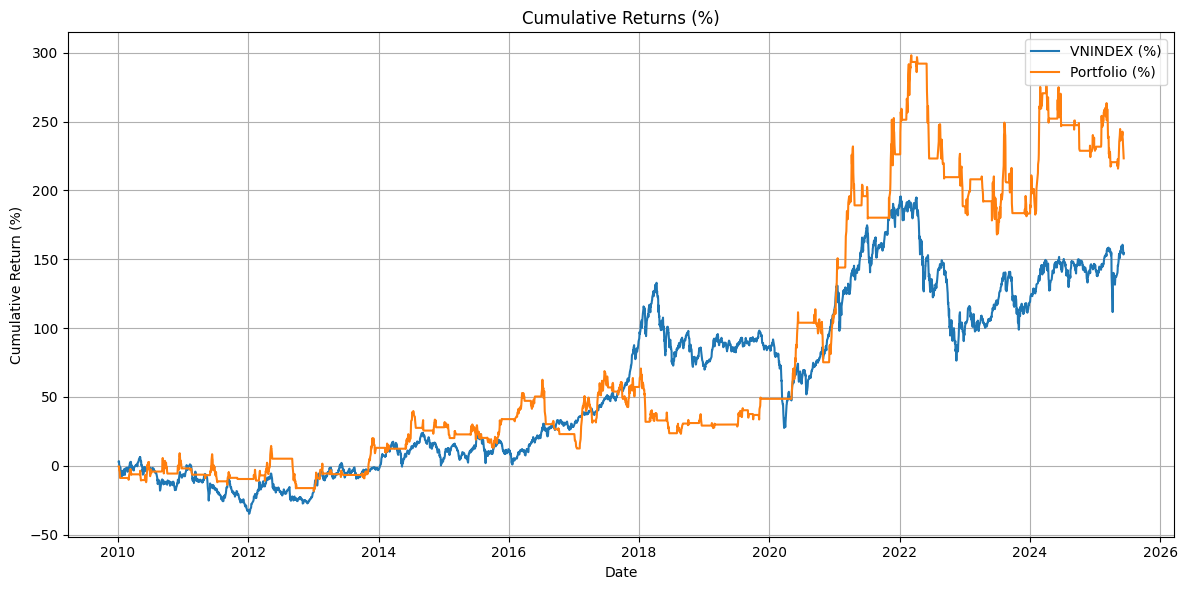

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read and parse date column correctly
df = pd.read_csv("backtest-data.csv")

# Convert 'Date/Time' to datetime in proper format
df["Date/Time"] = pd.to_datetime(df["Date/Time"], format="%d/%m/%Y %H:%M")

# Sort by date just in case
df = df.sort_values("Date/Time").reset_index(drop=True)

# Fill missing Portfolio Equity values
df["Portfolio Equity"] = df["Portfolio Equity"].ffill()
df.loc[df["Portfolio Equity"].isnull(), "Portfolio Equity"] = 100000

# Calculate daily returns
df["VNINDEX Return"] = df["VNINDEX Close"].pct_change()
df["Equity Return"]  = df["Portfolio Equity"].pct_change()

# Cumulative returns (%)
df["VNINDEX Cumulative"] = (1 + df["VNINDEX Return"]).cumprod() - 1
df["Equity Cumulative"]  = (1 + df["Equity Return"]).cumprod() - 1

# Performance metrics functions
def calculate_metrics(returns, cumulative_returns):
    total_return = cumulative_returns.iloc[-1]
    annual_return = (1 + total_return) ** (252 / len(returns.dropna())) - 1
    volatility = returns.std() * np.sqrt(252)
    sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(252)
    
    cum_nav = (1 + returns).cumprod()
    running_max = cum_nav.cummax()
    drawdown = (cum_nav - running_max) / running_max
    max_drawdown = drawdown.min()
    
    return total_return, annual_return, volatility, sharpe_ratio, max_drawdown

# Compute metrics
vn_total, vn_annual, vn_vol, vn_sharpe, vn_mdd = calculate_metrics(df["VNINDEX Return"], df["VNINDEX Cumulative"])
eq_total, eq_annual, eq_vol, eq_sharpe, eq_mdd = calculate_metrics(df["Equity Return"], df["Equity Cumulative"])

# Correlation
correlation = df[["VNINDEX Return", "Equity Return"]].corr().iloc[0,1]

# Print results
print(f"VNINDEX:")
print(f"Total Return:       {vn_total:.2%}")
print(f"Annualized Return:  {vn_annual:.2%}")
print(f"Volatility:         {vn_vol:.2%}")
print(f"Sharpe Ratio:       {vn_sharpe:.4f}")
print(f"Max Drawdown:       {vn_mdd:.2%}\n")

print(f"Portfolio:")
print(f"Total Return:       {eq_total:.2%}")
print(f"Annualized Return:  {eq_annual:.2%}")
print(f"Volatility:         {eq_vol:.2%}")
print(f"Sharpe Ratio:       {eq_sharpe:.4f}")
print(f"Max Drawdown:       {eq_mdd:.2%}\n")

print(f"Correlation between VNINDEX and Portfolio: {correlation:.4f}")

# Plot cumulative returns (%)
plt.figure(figsize=(12,6))
plt.plot(df["Date/Time"], df["VNINDEX Cumulative"] * 100, label="VNINDEX (%)")
plt.plot(df["Date/Time"], df["Equity Cumulative"] * 100, label="Portfolio (%)")
plt.title("Cumulative Returns (%)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
